In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from tqdm import tqdm

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

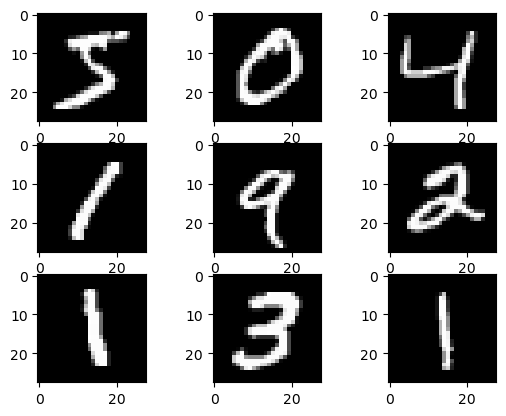

In [5]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [8]:
def noise(arr, p):
    res = np.array(arr)
    for i in range(len(res)):
        res[i] = 1 - res[i] if np.random.rand() < p else res[i]
        
    return res

arr1 = X_train[4]
arr2 = noise(arr1, 0.1)

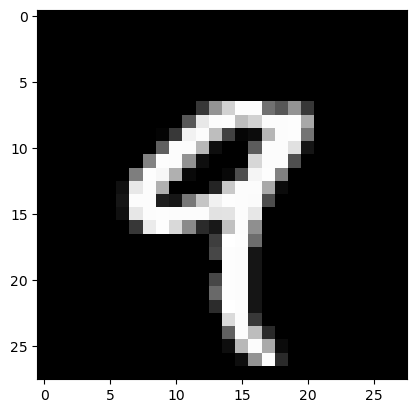

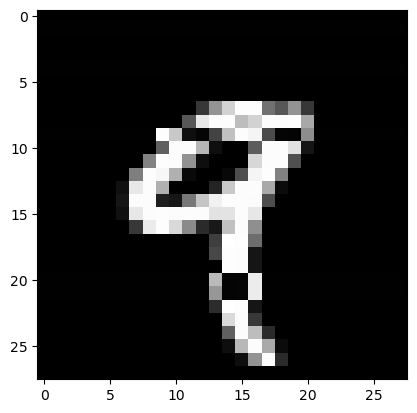

In [9]:
plt.imshow(arr1, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(arr2, cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
class Network(torch.nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1  = torch.nn.Linear(28 * 28, 256)
        self.act1 = torch.nn.ReLU()
        self.fc2  = torch.nn.Linear(256, 128)
        self.act2 = torch.nn.ReLU()
        self.fc3  = torch.nn.Linear(128, 10)
        self.act3 = torch.nn.Softmax()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        
        return x

In [12]:
inp = torch.tensor(X_train.reshape(60000, 784)).type(torch.float32)
out = torch.tensor([[0 if j != y_train[i] else 1 for j in range(10)] for i in range(y_train.size)]).type(torch.float32)

In [16]:
myNN = Network()

In [24]:
optimizer = torch.optim.Adam(myNN.parameters(), 0.001)
loss      = torch.nn.CrossEntropyLoss()

for i in range(100):
    optimizer.zero_grad()
    y_pred = myNN.forward(inp)
    
    loss_val = loss(y_pred, out)
    loss_val.backward()

    print(f"loss: {loss_val}")
    
    optimizer.step()

loss: 1.4684749841690063
loss: 1.5101380348205566
loss: 1.4742439985275269
loss: 1.4985989332199097
loss: 1.486735463142395
loss: 1.4744800329208374
loss: 1.4735561609268188
loss: 1.4751842021942139
loss: 1.4763506650924683
loss: 1.4763494729995728
loss: 1.474941611289978
loss: 1.4729570150375366
loss: 1.4712380170822144
loss: 1.4705184698104858
loss: 1.4703906774520874
loss: 1.4706889390945435
loss: 1.4708349704742432
loss: 1.4705506563186646
loss: 1.4700876474380493
loss: 1.4697171449661255
loss: 1.4693745374679565
loss: 1.4690912961959839
loss: 1.4689558744430542
loss: 1.4688448905944824
loss: 1.4687016010284424
loss: 1.4685766696929932
loss: 1.4684772491455078
loss: 1.4683886766433716
loss: 1.46833336353302
loss: 1.4682940244674683
loss: 1.468258023262024
loss: 1.4682217836380005
loss: 1.4681808948516846
loss: 1.468149185180664
loss: 1.4681261777877808
loss: 1.468103051185608
loss: 1.4680768251419067
loss: 1.468047857284546
loss: 1.4680081605911255
loss: 1.4679758548736572
loss: 1.

In [25]:
inp1 = torch.tensor(X_test.reshape(10000, 784)).type(torch.float32)
out1 = torch.tensor([[0 if j != y_test[i] else 1 for j in range(10)] for i in range(y_test.size)]).type(torch.float32)

In [32]:
preds       = []
noise_preds = []

for i in tqdm(range(10000)):
    t = torch.tensor(noise(inp1[i], 0.0)).type(torch.float32)
    ans = myNN.forward(t).type(torch.float32)
    preds.append(np.argmax(ans.detach().numpy()))
    
    t = torch.tensor(noise(inp1[i], 0.1)).type(torch.float32)
    ans = myNN.forward(t).type(torch.float32)
    noise_preds.append(np.argmax(ans.detach().numpy()))

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\Alex\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 565.37it/s]


Confusion matrix without noise


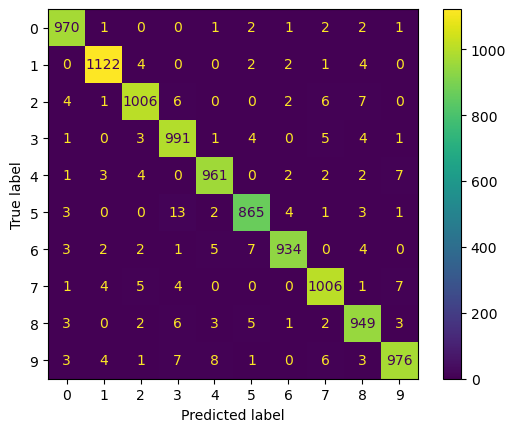

Confusion matrix with noise


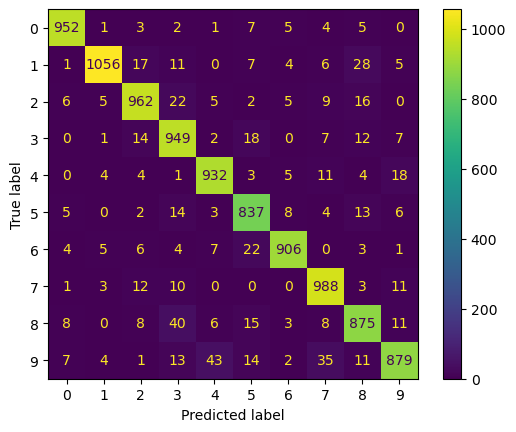

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn

preds       = np.array(preds)
noise_preds = np.array(noise_preds)


print('Confusion matrix without noise')
cm_display  = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, preds), display_labels = range(10))
cm_display.plot()
plt.show()

print('Confusion matrix with noise')
cm_display  = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, noise_preds), display_labels = range(10))
cm_display.plot()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score


print(f'Accuracy\nDefault: {accuracy_score(y_test, preds)}\nNoise: {accuracy_score(y_test, noise_preds)}')

Accuracy
Default: 0.978
Noise: 0.9336
